<a href="https://colab.research.google.com/github/abdlkrim3/Machine_Learning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#!apt-get install -y git

In [ ]:
#!git clone https://github.com/abdlkrim3/Machine_Learning.git

In [ ]:
dataset = pd.read_csv('./titanic.csv')

In [ ]:
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
dataset.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


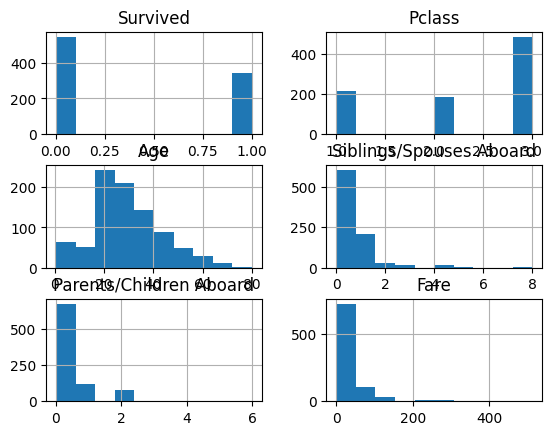

In [ ]:
dataset.hist()
plt.show()

In [ ]:
# Suppression des colonnes non pertinentes
dataset = dataset.drop(["Name"], axis=1)

In [ ]:

# Remplacement des valeurs manquantes par la médiane pour l'âge
dataset["Age"].fillna(dataset["Age"].median(), inplace=True)

In [ ]:
# Conversion des variables catégorielles en variables binaires
dataset = pd.get_dummies(dataset, columns=["Sex"], drop_first=True)

In [ ]:
dataset

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,1
883,1,1,19.0,0,0,30.0000,0
884,0,3,7.0,1,2,23.4500,0
885,1,1,26.0,0,0,30.0000,1


In [ ]:
# Normalisation des variables continues (âge et tarif)
dataset["Age"] = (dataset["Age"] - dataset["Age"].mean()) / dataset["Age"].std()
dataset["Fare"] = (dataset["Fare"] - dataset["Fare"].mean()) / dataset["Fare"].std()

In [ ]:
dataset

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,-0.529068,1,0,-0.503302,1
1,1,1,0.603924,1,0,0.782971,0
2,1,3,-0.245820,0,0,-0.489743,0
3,1,1,0.391488,1,0,0.417712,0
4,0,3,0.391488,0,0,-0.487232,1
...,...,...,...,...,...,...,...
882,0,2,-0.175008,0,0,-0.387799,1
883,1,1,-0.741503,0,0,-0.046310,0
884,0,3,-1.591247,1,2,-0.177884,0
885,1,1,-0.245820,0,0,-0.046310,1


In [ ]:
# Séparation des caractéristiques (X) et de la variable cible (y)
X = dataset.drop("Survived", axis=1).values
y = dataset["Survived"].values

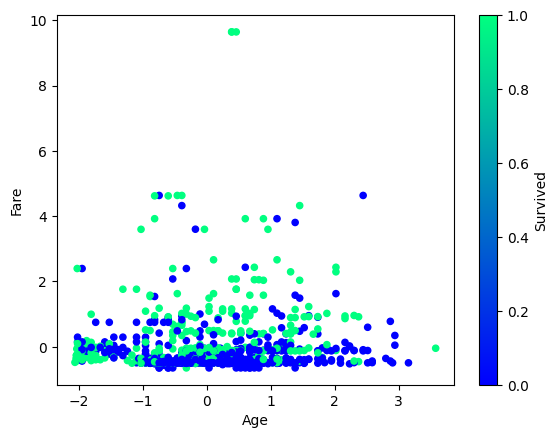

In [ ]:
dataset.plot.scatter(x='Age',y='Fare', c='Survived', colormap='winter')
plt.show()

### 2. Modèle


In [ ]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [ ]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [ ]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [ ]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [ ]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [ ]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [ ]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=1000):
    # Initialisation
    W, b = initialisation(X)
    loss_history = []
    
    # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)
    
    # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    
    return W, b

<ipython-input-159-1a788f378450>:2: RuntimeWarning: divide by zero encountered in log
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
<ipython-input-159-1a788f378450>:2: RuntimeWarning: invalid value encountered in multiply
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


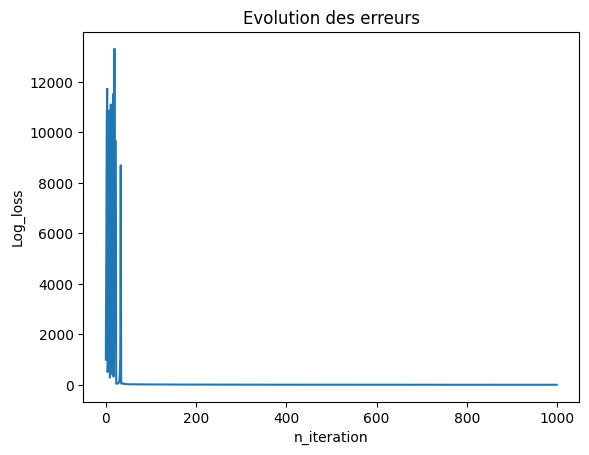

In [ ]:
W,b=regression_logistique(X, y)

In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
y_pred = predict(X, W, b)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtention des classes prédites
accuracy = accuracy_score(y, y_pred_classes)
print("Accuracy =", accuracy)



[[1.91499674e-05 9.99996630e-01 9.99996630e-01 ... 1.91499674e-05
  9.99996630e-01 1.91499674e-05]
 [6.04708780e-03 9.87815568e-01 9.87815568e-01 ... 6.04708780e-03
  9.87815568e-01 6.04708780e-03]
 [6.27871788e-04 9.99996636e-01 9.99996636e-01 ... 6.27871788e-04
  9.99996636e-01 6.27871788e-04]
 ...
 [8.97095050e-04 9.99999939e-01 9.99999939e-01 ... 8.97095050e-04
  9.99999939e-01 8.97095050e-04]
 [3.30715497e-03 9.59015824e-01 9.59015824e-01 ... 3.30715497e-03
  9.59015824e-01 3.30715497e-03]
 [3.73363395e-05 9.99995770e-01 9.99995770e-01 ... 3.73363395e-05
  9.99995770e-01 3.73363395e-05]]
Accuracy = 0.3855693348365276


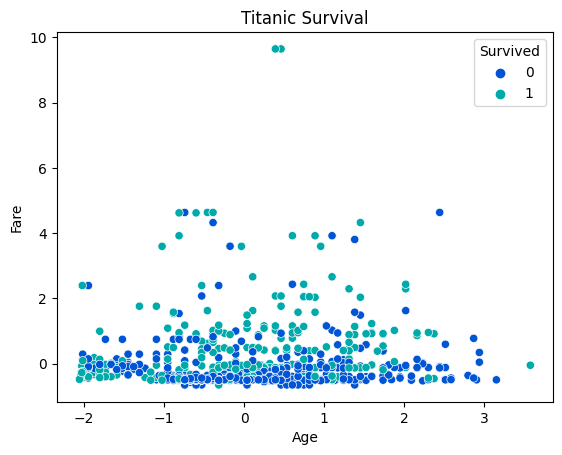

In [ ]:
# Plotting the dataset
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dataset, palette='winter')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic Survival')
plt.show()

# Drawing the decision boundary
x_min, x_max = dataset['Age'].min() - 1, dataset['Age'].max() + 1
y_min, y_max = dataset['Fare'].min() - 1, dataset['Fare'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


**`En utilisant SicitLearn`**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Chargement des données
data = pd.read_csv("titanic.csv")

# Sélection des colonnes pertinentes
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

In [ ]:
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [ ]:
# Prétraitement des données
data["Age"] = (data["Age"] - data["Age"].mean()) / data["Age"].std()
data["Fare"] = (data["Fare"] - data["Fare"].mean()) / data["Fare"].std()
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data['Survived'] = data['Survived'].astype('int')

In [ ]:
# Séparation des features et de la variable cible
X = data.drop('Survived', axis=1)
y = data['Survived']

In [ ]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalisation des features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

In [ ]:
# Évaluation des performances du modèle
accuracy = model.score(X_test, y_test)
print("Précision du modèle :", accuracy)

Précision du modèle : 0.797752808988764


In [ ]:
# Exemple de données pour prédiction
new_data = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['male'],
    'Age': [26.0],
    'Siblings/Spouses Aboard': [0],
    'Parents/Children Aboard': [0],
    'Fare': [30.0000]
})

In [ ]:
# Prétraitement des nouvelles données
new_data["Age"] = (new_data["Age"] - data["Age"].mean()) / data["Age"].std()
new_data["Fare"] = (new_data["Fare"] - data["Fare"].mean()) / data["Fare"].std()
new_data=pd.get_dummies(new_data, columns=['Sex'])

In [ ]:
new_data

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,1,26.0,0,0,30.0,1


In [ ]:
# Transformation des nouvelles données avec le scaler ajusté
new_data_scaled = scaler.transform(new_data)

# Prédiction sur les nouvelles données
prediction = model.predict(new_data_scaled)

print("Prédiction:", prediction)

Prédiction: [0]


In [ ]:
from sklearn.metrics import confusion_matrix 

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print("Matrice de confusion :")
print(cm)

Matrice de confusion :
[[102  15]
 [ 21  40]]


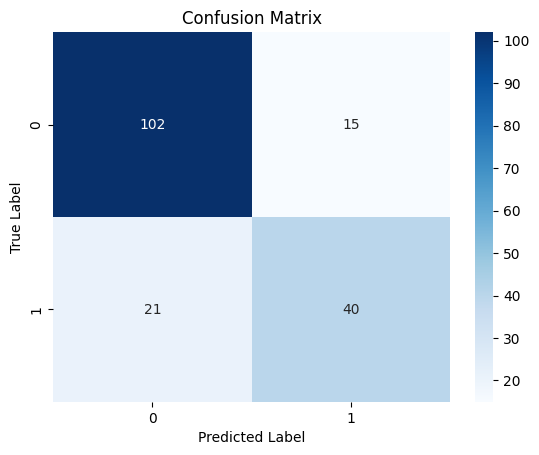

In [ ]:
import seaborn as sns

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec un heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
